c:\Users\jiri.pesik.HULD\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\jiri.pesik.HULD\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\jiri.pesik.HULD\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\jiri.pesik.HULD\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: Fut

<Axes: xlabel='Rating', ylabel='count'>

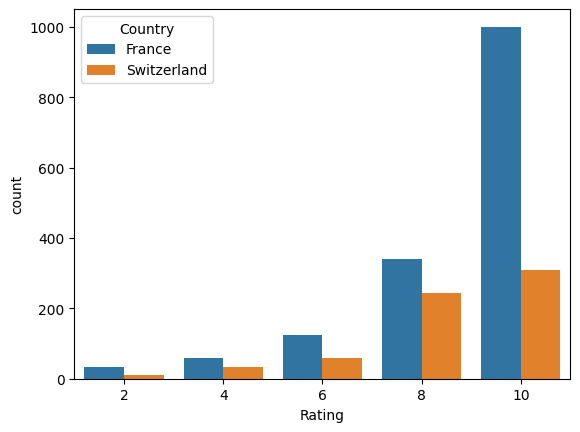

In [1]:
import pandas as pd
from scipy import stats
import seaborn as sns

data = pd.read_csv("global_hotel_reviews.csv")
data = data[data["Country"].isin(["France", "Switzerland"])]
data.to_csv("global_hotel_reviews.csv", index=False)
data_fr = data[data["Country"] == "France"]
data_sw = data[data["Country"] == "Switzerland"]

sns.countplot(data=data, x="Rating", hue="Country")

In [2]:
data_fr["Rating"].mean()

8.845215157353886

In [3]:
data_sw["Rating"].mean()

8.441754916792739

In [4]:
stats.mannwhitneyu(data_fr["Rating"], data_sw["Rating"])

MannwhitneyuResult(statistic=595459.0, pvalue=2.7190215861872277e-11)

In [5]:
data = pd.read_csv("salaries-2022.csv")
data = data[data["Position title"].isin(["Professor", "Associate Professor"])]
data.to_csv("salaries-2022.csv", index=False)
data.head()

,Surname,Given name,Position title,Salary paid ($),Taxable benefits ($)
0,ABDEL-RAHMAN,EIHAB,Professor,"210,256.84",301.76
1,ABOUEE MEHRIZI,HOSSEIN,Associate Professor,"206,893.56",630.20
2,ABUKHDEIR,NASSER M.,Associate Professor,"176,116.32",591.56
3,ACHESON,KATHERINE,Professor,"193,308.12",708.72
4,ACKER,STACEY,Associate Professor,"135,384.80",469.72


In [6]:
data.dtypes

Surname                 object
Given name              object
Position title          object
Salary paid ($)         object
Taxable benefits ($)    object
dtype: object

In [7]:
data["Salary paid ($)"] = data["Salary paid ($)"].str.replace(",", "").astype(float)

c:\Users\jiri.pesik.HULD\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\jiri.pesik.HULD\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\jiri.pesik.HULD\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\jiri.pesik.HULD\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: Fut

<Axes: xlabel='Salary paid ($)', ylabel='Count'>

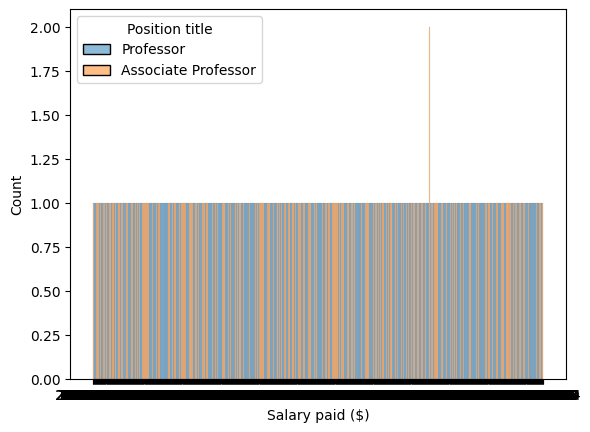

In [8]:
sns.histplot(data=data, x="Salary paid ($)", hue="Position title")

In [9]:
data_prof = data[data["Position title"] == "Professor"]
data_asoc_prof = data[data["Position title"] == "Associate Professor"]

In [10]:
stats.normaltest(data_prof["Salary paid ($)"])

TypeError: unsupported operand type(s) for /: 'str' and 'int'

In [ ]:
stats.mannwhitneyu(data_prof["Salary paid ($)"], data_asoc_prof["Salary paid ($)"], alternative="greater")

MannwhitneyuResult(statistic=162896.0, pvalue=3.1384171623279043e-65)